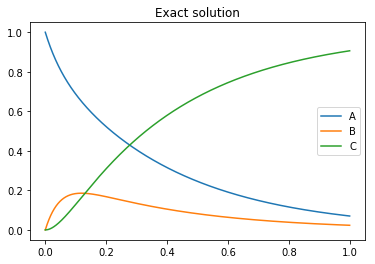

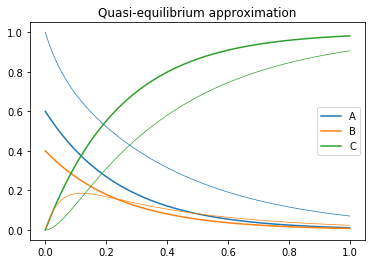

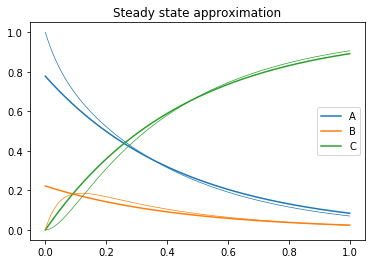

In [84]:
# Two consecutive reactions, the first one is reversible:
# a <-> b -> c

# Rate constants:
# a -> b, k1
# b -> a, k_1
# b -> c, k2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a0 = 1
b0 = c0 = 0
init_c = (a0, b0, c0)

# Change rate constants and see what happens.
# Quasi-equilibrium approximation is valid when k_1 >> k2
# Steady state approximation is valid when (k_1 + k2) >> k1
k1 =  5 * 10**0
k_1 = 7.5 * 10**0
k2 =  1 * 10**1

def f(y, t):
    dadt = -k1 * y[0] + k_1 * y[1]
    dbdt = k1 * y[0] - (k_1 + k2) * y[1]
    dcdt = k2 * y[1]
    return (dadt, dbdt, dcdt)

t_final = 1
t_step = 1e-2
t_span = np.arange(0, t_final+t_step/2, t_step)

res = odeint(f, init_c, t_span)
lines = plt.plot(t_span, res)
plt.legend(lines, ("A", "B", "C"))
plt.title("Exact solution")
plt.show()

# quasi-equilibrium:
K = k1/k_1
a0 = 1 / (1 + K)
b0 = K / (1 + K)
init_c = (a0, b0, c0)

def f_qe(y, t):
    dadt = -k2 * K * y[0] * 1 / (1 + K)
    dbdt = -k2 * K * y[0] * K / (1 + K)
    dcdt = k2 * K * y[0]
    return (dadt, dbdt, dcdt)

res_qe = odeint(f_qe, init_c, t_span)
lines_qe = plt.plot(t_span, res_qe)
plt.legend(lines_qe, ("A", "B", "C"))
plt.gca().set_prop_cycle(None)
plt.plot(t_span, res, lw=0.7)
plt.title("Quasi-equilibrium approximation")
plt.show()

# steady state:
K_ss = k1/(k_1 + k2)
a0 = 1 / (1 + K_ss)
b0 = K_ss / (1 + K_ss)
init_c = (a0, b0, c0)

def f_ss(y, t):
    dadt = -k2 * K_ss * y[0] * 1 / (1 + K_ss)
    dbdt = -k2 * K_ss * y[0] * K_ss / (1 + K_ss)
    dcdt = k2 * K_ss * y[0]
    return (dadt, dbdt, dcdt)

res_ss = odeint(f_ss, init_c, t_span)
lines_ss = plt.plot(t_span, res_ss)
plt.legend(lines_ss, ("A", "B", "C"))
plt.gca().set_prop_cycle(None)
plt.plot(t_span, res, lw=0.7)
plt.title("Steady state approximation")
plt.show()